<a href="https://colab.research.google.com/github/raghavharshita/Colab-Files-Notes/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering


/tmp/ipython-input-3430699288.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],s=50,cmap='viridis')


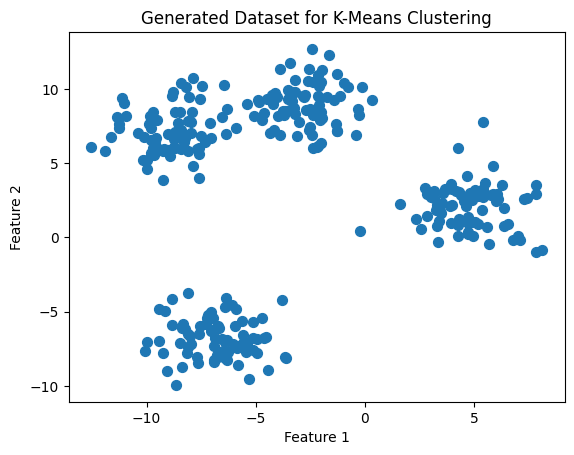

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples=300
n_features=2
centers=4

#generate data
x,y =make_blobs(n_samples=n_samples,n_features=n_features,centers=centers,cluster_std=1.5,random_state=42)

plt.scatter(x[:,0],x[:,1],s=50,cmap='viridis')
plt.title('Generated Dataset for K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_init=10,n_clusters=i)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)


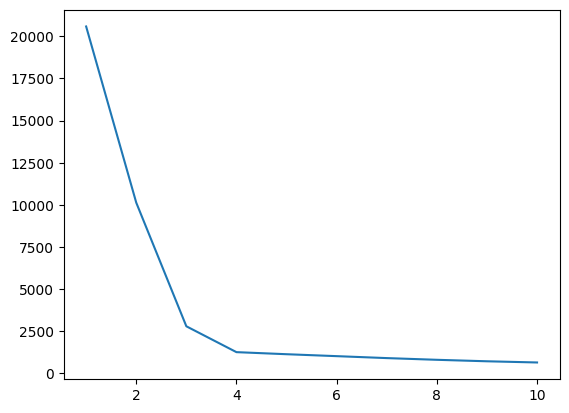

In [ ]:
plt.plot(range(1,11),WCSS)

In [ ]:
from sklearn.metrics import silhouette_score
sil=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(x)
  silhouette_avg=silhouette_score(x,cluster_labels)
  sil.append(silhouette_avg)

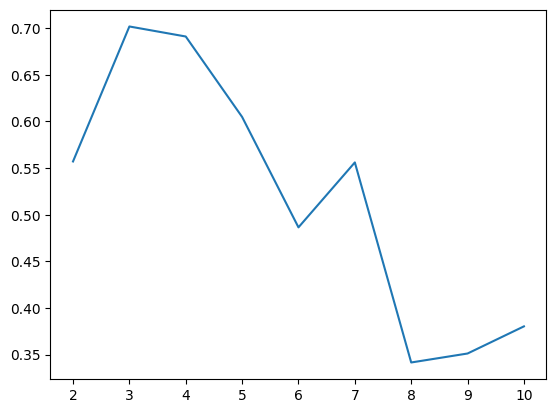

In [ ]:
plt.plot(range(2,11),sil)

In [ ]:
kmeans=KMeans(n_init=10,n_clusters=3)

In [ ]:
y_kmeans=kmeans.fit_predict(x)

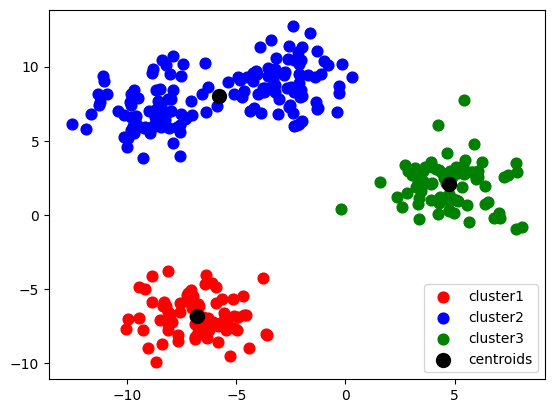

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=60,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=60,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=60,c='green',label='cluster3')
# plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=60,c='yellow',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')
plt.legend()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

x=np.array([[1,2],[2,2],[2,3],[8,7],[8,8],[25,80]])

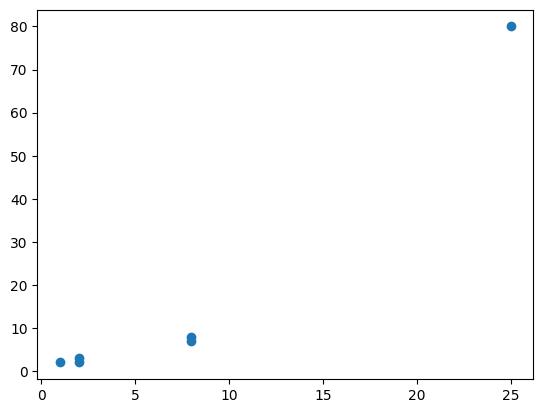

In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [ ]:
db=DBSCAN(eps=3,min_samples=2)
db.fit(x)
db.labels_

array([ 0,  0,  0,  1,  1, -1])

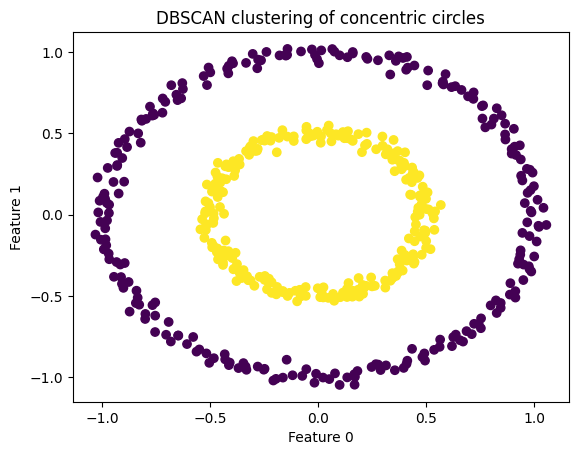

In [ ]:
from sklearn.datasets import make_circles

x,_=make_circles(n_samples=500,factor=.5,noise=0.03,random_state=4)

dbscan=DBSCAN(eps=0.1,min_samples=5)
clusters=dbscan.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=clusters,cmap='viridis',marker='o')
plt.title('DBSCAN clustering of concentric circles')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [ ]:
customer_data=pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data=customer_data.iloc[:,3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

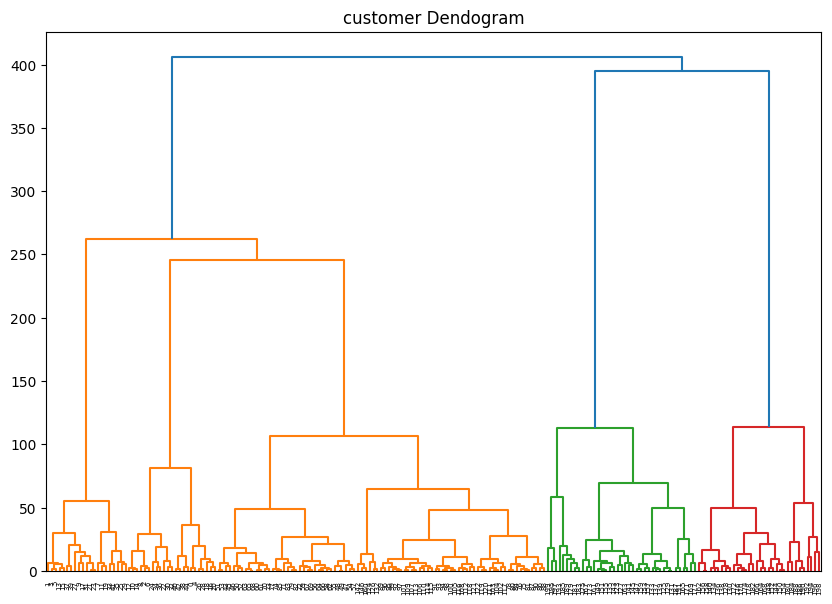

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
plt.title('customer Dendogram')
dend=sch.dendrogram(sch.linkage(data,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=5,linkage='ward', metric='euclidean')
labels_=cluster.fit_predict(data)

In [ ]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0, 0.5, 'Spending Score')

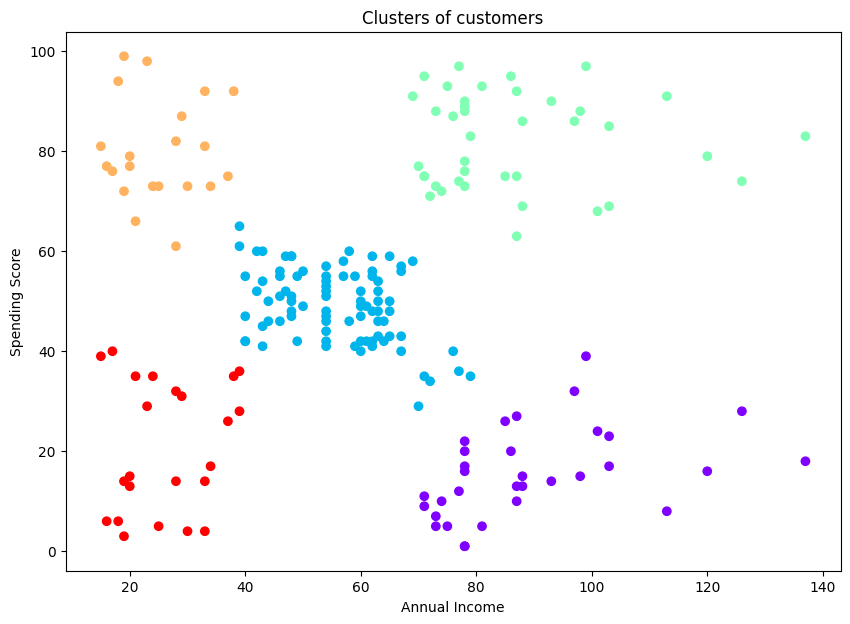

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=labels_,cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

## Gaussian Mixture Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate a toy 2D dataset
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

/tmp/ipython-input-2116838887.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],cmap='viridis',s=40)


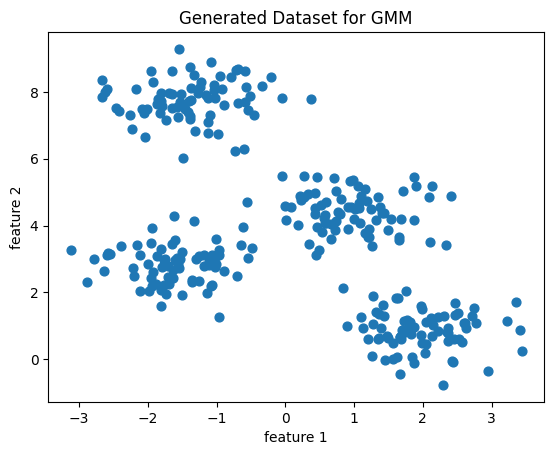

In [ ]:
plt.scatter(x[:,0],x[:,1],cmap='viridis',s=40)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Generated Dataset for GMM')
plt.show()

In [ ]:
gmm=GaussianMixture(n_components=4,random_state=0).fit(x)
labels=gmm.predict(x)

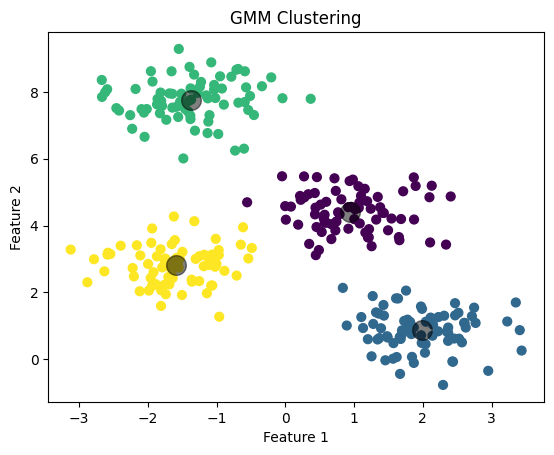

In [ ]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis',s=40)

centers=gmm.means_
plt.scatter(centers[:,0],centers[:,1],c='black',alpha=0.5,s=200)
plt.title("GMM Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
gmm.converged_

True

In [ ]:
gmm.n_iter_

2

In [ ]:
gmm.covariances_

array([[[ 0.3808649 , -0.02231979],
        [-0.02231979,  0.34881473]],

       [[ 0.33998651, -0.02620931],
        [-0.02620931,  0.34588507]],

       [[ 0.41216925,  0.02884065],
        [ 0.02884065,  0.37959193]],

       [[ 0.32360185,  0.01027908],
        [ 0.01027908,  0.30862196]]])

In [ ]:
gmm.means_

array([[ 0.93842466,  4.41564635],
       [ 1.98299679,  0.86735608],
       [-1.37355181,  7.75436785],
       [-1.58913964,  2.82465347]])

In [ ]:
gmm.weights_

array([0.25170956, 0.24991431, 0.24988383, 0.2484923 ])

In [ ]:
gmm.predict(x)

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3])

In [ ]:
gmm.predict_proba(x)

array([[2.59296402e-02, 9.71688955e-01, 8.04672295e-21, 2.38140471e-03],
       [7.15846263e-09, 7.13116691e-33, 9.99999993e-01, 2.34837535e-15],
       [9.99999970e-01, 8.78022033e-12, 2.04767765e-08, 9.13480329e-09],
       ...,
       [9.99965893e-01, 4.92339895e-10, 8.75462809e-09, 3.40976171e-05],
       [3.01241053e-06, 6.44915198e-30, 9.99996988e-01, 1.52780115e-18],
       [4.39280339e-07, 1.99754828e-11, 4.05180546e-15, 9.99999561e-01]])

In [ ]:
gmm.sample(10)

(array([[ 2.55610607,  4.45621673],
        [ 1.9303778 ,  5.19270329],
        [ 0.09870935,  4.51623826],
        [ 1.40564809,  2.42583981],
        [ 2.02981046,  1.30394406],
        [ 2.64811376,  1.31382462],
        [-1.24527745,  8.02115905],
        [-0.94451894,  8.26765175],
        [-1.77618454,  3.15008423],
        [-0.64849308,  2.9529137 ]]),
 array([0, 0, 0, 1, 1, 1, 2, 2, 3, 3]))

Text(0.5, 0, 'Number of components')

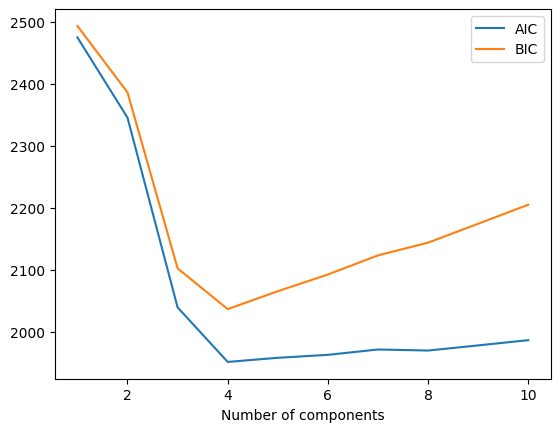

In [ ]:
N=10
aics=[]
bics=[]
for i in range(1,N+1):
  gmm=GaussianMixture(n_components=i,random_state=0)
  gmm.fit(x)
  aics.append(gmm.aic(x))
  bics.append(gmm.bic(x))

plt.plot(range(1,N+1),aics,label='AIC')
plt.plot(range(1,N+1),bics,label='BIC')
plt.legend()
plt.xlabel('Number of components')

## T-SNE

In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
# Select 10000 random points
np.random.seed(42)  # For reproducibility
indices = np.random.choice(range(X.shape[0]), size=10000, replace=False)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

In [5]:
X_subset.shape

(10000, 784)

In [6]:
# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

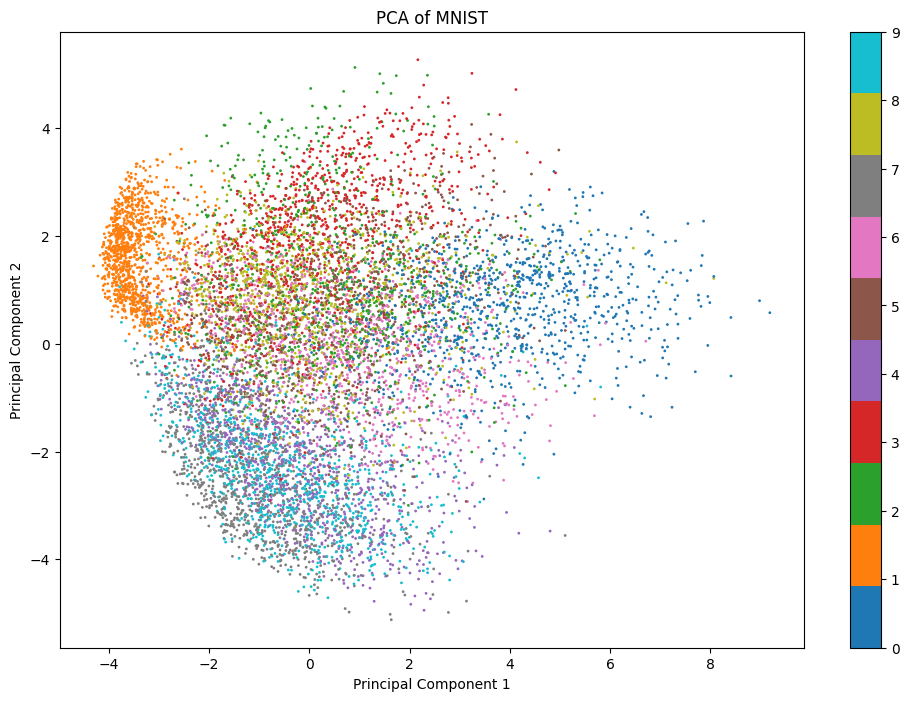

In [7]:
# Plotting with Matplotlib
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [8]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [9]:
X_tsne.shape

(10000, 2)

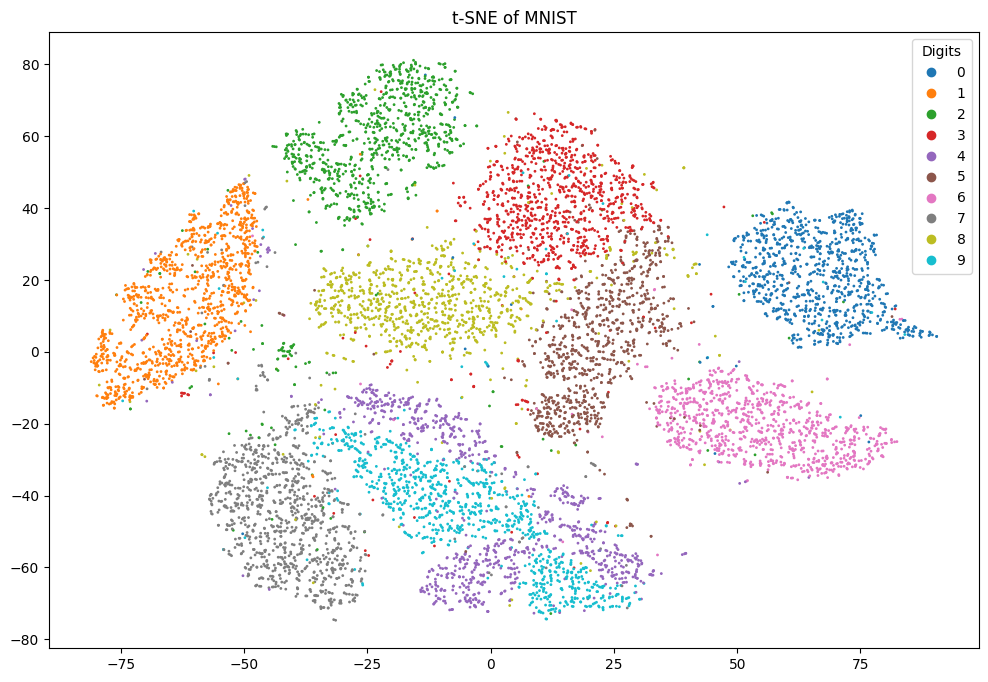

In [10]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of MNIST')
plt.show()

In [11]:
tsne.embedding_

array([[ -8.358673 ,  15.3086815],
       [ -1.102147 , -24.872536 ],
       [  9.446066 ,  22.465147 ],
       ...,
       [ 10.437613 ,  61.8598   ],
       [ 39.16124  ,  51.19298  ],
       [  2.5127952,  40.66482  ]], dtype=float32)

In [12]:
tsne.kl_divergence_

1.819270372390747

In [13]:
tsne.learning_rate_

np.float64(208.33333333333334)

In [14]:
tsne.n_iter_

999